In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!ls "/content/drive/MyDrive/Colab Notebooks/Deep-Convolutional-Neural-Network-for-Automated-Leaf-Disease-Detection-in-Plants"

 Dataset   Plant_Leaf_Disease_Prediction.ipynb	'Streamlit App'
 Model	   readme.md


In [11]:
!ls "/content/drive/MyDrive/Colab Notebooks/Deep-Convolutional-Neural-Network-for-Automated-Leaf-Disease-Detection-in-Plants/Dataset"

'Alternaria Leaf Blight'  'Puccinia Rust'  'Xanthomonas Leaf Spot'


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

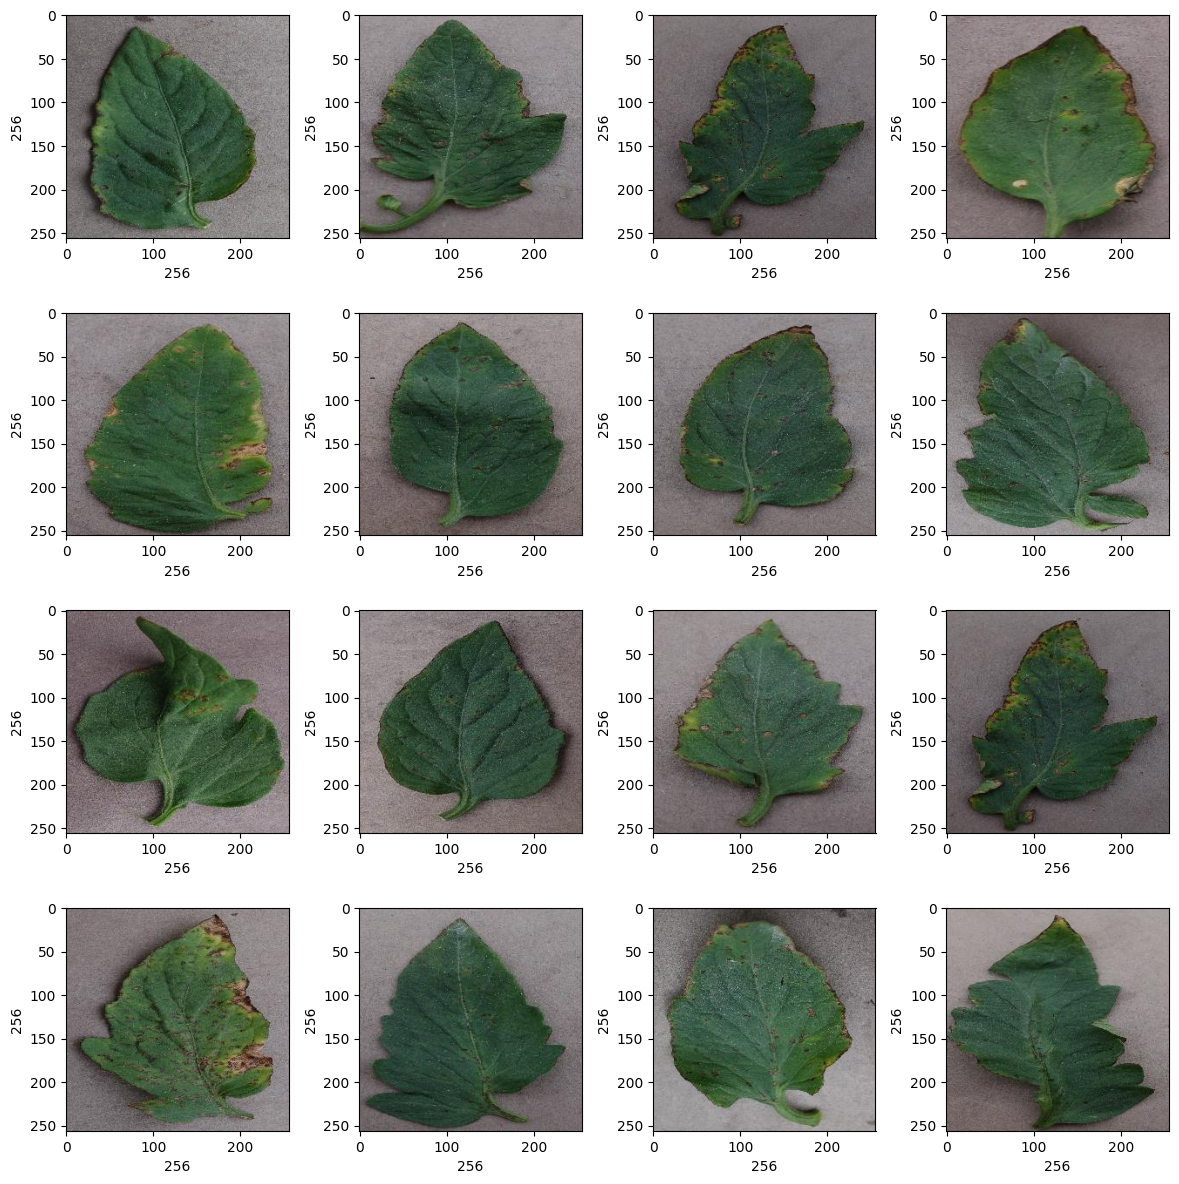

In [13]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Colab Notebooks/Deep-Convolutional-Neural-Network-for-Automated-Leaf-Disease-Detection-in-Plants/Dataset/Xanthomonas Leaf Spot"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [14]:
#Converting Images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [15]:
dir = "/content/drive/MyDrive/Colab Notebooks/Deep-Convolutional-Neural-Network-for-Automated-Leaf-Disease-Detection-in-Plants/Dataset"
image_list, label_list = [], []
all_labels = ['Xanthomonas Leaf Spot', 'Alternaria Leaf Blight', 'Puccinia Rust']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in ['Xanthomonas Leaf Spot', 'Alternaria Leaf Blight', 'Puccinia Rust']:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [16]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

,count
0,
0,300
1,300
2,300


In [17]:
image_list[0].shape

(256, 256, 3)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [19]:
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [20]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [23]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

In [24]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 47s 9s/step - accuracy: 0.3531 - loss: 1.0688 - val_accuracy: 0.5694 - val_loss: 0.9687
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 68s 6s/step - accuracy: 0.6555 - loss: 0.9433 - val_accuracy: 0.9167 - val_loss: 0.8462
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 6s/step - accuracy: 0.8560 - loss: 0.8211 - val_accuracy: 0.9444 - val_loss: 0.7296
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 32s 6s/step - accuracy: 0.9381 - loss: 0.7027 - val_accuracy: 0.9444 - val_loss: 0.6213
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.9414 - loss: 0.5856 - val_accuracy: 0.9514 - val_loss: 0.5168
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 6s/step - accuracy: 0.9428 - loss: 0.4784 - val_accuracy: 0.9444 - val_loss: 0.4293
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.9563 - loss: 0.3958 - val_accuracy: 0.9444 - val_loss: 0.3573
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.9569 - loss: 0.3256 - val_accuracy: 0.9583 - val_loss: 0.3009
Epoch 9/

In [26]:
model.save("/content/drive/MyDrive/Colab Notebooks/Deep-Convolutional-Neural-Network-for-Automated-Leaf-Disease-Detection-in-Plants/Model/PlantPathologyDeepClassifier.h5")

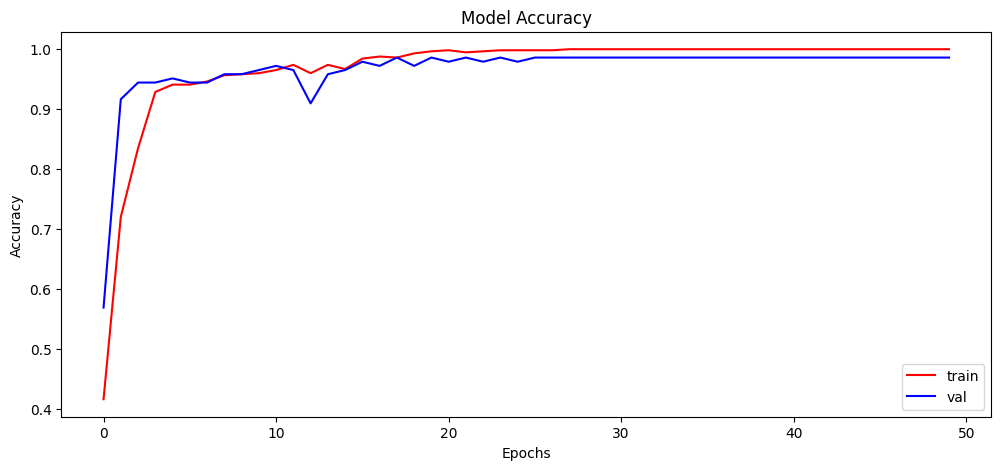

In [27]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [28]:
print("Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 422ms/step - accuracy: 0.9959 - loss: 0.0300
Test Accuracy: 98.88888597488403


In [29]:
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 445ms/step


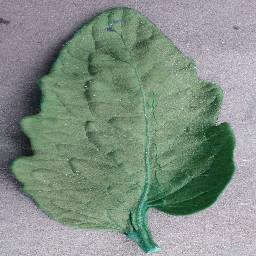

In [30]:
# Plotting image to compare
img = array_to_img(x_test[11])
img

In [31]:
# Finding max value from predition list and comaparing original value vs predicted
print("Original Label: ",all_labels[np.argmax(y_test[11])])
print("Predicted Label: ",all_labels[np.argmax(y_pred[4])])
print (y_pred[2])

Original Label:  Xanthomonas Leaf Spot
Predicted Label:  Xanthomonas Leaf Spot
[1.1277838e-06 1.2881435e-03 9.9871069e-01]


In [32]:
for i in range(50):
  print (all_labels[np.argmax(y_test[i])], "-", all_labels[np.argmax(y_pred[i])])

Alternaria Leaf Blight - Alternaria Leaf Blight
Xanthomonas Leaf Spot - Xanthomonas Leaf Spot
Puccinia Rust - Puccinia Rust
Xanthomonas Leaf Spot - Xanthomonas Leaf Spot
Xanthomonas Leaf Spot - Xanthomonas Leaf Spot
Puccinia Rust - Puccinia Rust
Xanthomonas Leaf Spot - Xanthomonas Leaf Spot
Alternaria Leaf Blight - Alternaria Leaf Blight
Alternaria Leaf Blight - Alternaria Leaf Blight
Alternaria Leaf Blight - Alternaria Leaf Blight
Alternaria Leaf Blight - Alternaria Leaf Blight
Xanthomonas Leaf Spot - Xanthomonas Leaf Spot
Puccinia Rust - Puccinia Rust
Puccinia Rust - Puccinia Rust
Xanthomonas Leaf Spot - Xanthomonas Leaf Spot
Puccinia Rust - Puccinia Rust
Xanthomonas Leaf Spot - Xanthomonas Leaf Spot
Xanthomonas Leaf Spot - Xanthomonas Leaf Spot
Puccinia Rust - Puccinia Rust
Puccinia Rust - Puccinia Rust
Puccinia Rust - Puccinia Rust
Xanthomonas Leaf Spot - Xanthomonas Leaf Spot
Xanthomonas Leaf Spot - Xanthomonas Leaf Spot
Puccinia Rust - Puccinia Rust
Alternaria Leaf Blight - Alter